In [3]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 5.1 MB/s eta 0:00:00
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


Data collection and preprocessing

In [4]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [5]:
# Target search for MITF
target = new_client.target
target_query = target.search('MITF')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q08874', 'xref_name': None, 'xre...",Mus musculus,Microphthalmia-associated transcription factor,18.0,False,CHEMBL1075142,"[{'accession': 'Q08874', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'O75030', 'xref_name': None, 'xre...",Homo sapiens,Microphthalmia-associated transcription factor,16.0,False,CHEMBL1741165,"[{'accession': 'O75030', 'component_descriptio...",SINGLE PROTEIN,9606


In [6]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL1741165'

In [7]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(type="AC50")

In [8]:
df = pd.DataFrame.from_dict(res)

In [9]:
df.head(3)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Active,5329217,[],CHEMBL1737866,PUBCHEM_BIOASSAY: MITF Measured in Cell-Based ...,F,None,None,BAO_0000186,BAO_0000219,...,Homo sapiens,Microphthalmia-associated transcription factor,9606,None,None,AC50,uM,UO_0000065,None,14.701
1,Active,5329218,[],CHEMBL1737866,PUBCHEM_BIOASSAY: MITF Measured in Cell-Based ...,F,None,None,BAO_0000186,BAO_0000219,...,Homo sapiens,Microphthalmia-associated transcription factor,9606,None,None,AC50,uM,UO_0000065,None,3.952
2,Active,5329219,[],CHEMBL1737866,PUBCHEM_BIOASSAY: MITF Measured in Cell-Based ...,F,None,None,BAO_0000186,BAO_0000219,...,Homo sapiens,Microphthalmia-associated transcription factor,9606,None,None,AC50,uM,UO_0000065,None,3.797


In [10]:
df.type.unique()

array(['AC50'], dtype=object)

In [11]:
df.to_csv('bioactivity_data.csv', index=False)

In [12]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [13]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data2"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data2’: File exists


In [14]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [15]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

-rw------- 1 root root 1777149 Jan 28 07:56 '/content/gdrive/My Drive/Colab Notebooks/data'


In [16]:
! ls

bioactivity_data.csv  gdrive  sample_data


In [17]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
Active,5329217,[],CHEMBL1737866,PUBCHEM_BIOASSAY: MITF Measured in Cell-Based System Using Plate Reader - 2084-01_Inhibitor_DoseNoFile_CherryPick_Activity_Set2. (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID488944],F,,,BAO_0000186,BAO_0000219,cell-based format,OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH

In [18]:
df['value'] = df['value'].astype(float)

In [19]:
df2 = df[df.value.notna()]
df2.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Active,5329217,[],CHEMBL1737866,PUBCHEM_BIOASSAY: MITF Measured in Cell-Based ...,F,None,None,BAO_0000186,BAO_0000219,...,Homo sapiens,Microphthalmia-associated transcription factor,9606,None,None,AC50,uM,UO_0000065,None,14.701
1,Active,5329218,[],CHEMBL1737866,PUBCHEM_BIOASSAY: MITF Measured in Cell-Based ...,F,None,None,BAO_0000186,BAO_0000219,...,Homo sapiens,Microphthalmia-associated transcription factor,9606,None,None,AC50,uM,UO_0000065,None,3.952
2,Active,5329219,[],CHEMBL1737866,PUBCHEM_BIOASSAY: MITF Measured in Cell-Based ...,F,None,None,BAO_0000186,BAO_0000219,...,Homo sapiens,Microphthalmia-associated transcription factor,9606,None,None,AC50,uM,UO_0000065,None,3.797


In [20]:
df['value'] = df['value'].astype(float)

In [21]:
df3 = df["value"].mean()


In [22]:
df3

12.583778726198293

In [23]:
bioactivity_class = []
for i in df2.value:
  if float(i) >= 12.583778726198293:
    bioactivity_class.append("inactive")
  if float(i) <=12.583778726198293 :
    bioactivity_class.append("active")

In [24]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [25]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

In [26]:
value = []
for i in df2.value:
  value.append(i)

In [27]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, value))
df4 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'value'])

In [28]:
df4.head(3)


,molecule_chembl_id,canonical_smiles,bioactivity_class,value
0,CHEMBL1438983,OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH]c2ccccc12)c1ccccc1,inactive,14.701
1,CHEMBL1598631,Cc1ccc(C#CC[N+]2(CC#Cc3ccc(C)cc3)CCCCC2)cc1.[Br-],active,3.952
2,CHEMBL1566130,N#C/C(=C(/O)c1ccc([N+](=O)[O-])o1)c1nc2ccccc2[...,active,3.797


In [29]:
df4.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [30]:
! ls -l

total 1968
-rw-r--r-- 1 root root 1777149 Jan 28 07:54 bioactivity_data.csv
-rw-r--r-- 1 root root  226454 Jan 28 07:56 bioactivity_preprocessed_data.csv
drwx------ 5 root root    4096 Jan 28 07:56 gdrive
drwxr-xr-x 1 root root    4096 Jan 26 14:33 sample_data


In [31]:
! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [32]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

'/content/gdrive/My Drive/Colab Notebooks/data'


In [33]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-01-28 07:56:51--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   203MB/s    in 0.4s    

2023-01-28 07:56:52 (203 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('/content/bioactivity_preprocessed_data.csv')

In [36]:
df.head(3)

,molecule_chembl_id,canonical_smiles,bioactivity_class,value
0,CHEMBL1438983,OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH]c2ccccc12)c1ccccc1,inactive,14.701
1,CHEMBL1598631,Cc1ccc(C#CC[N+]2(CC#Cc3ccc(C)cc3)CCCCC2)cc1.[Br-],active,3.952
2,CHEMBL1566130,N#C/C(=C(/O)c1ccc([N+](=O)[O-])o1)c1nc2ccccc2[...,active,3.797


In [37]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [38]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [39]:
df_lipinski = lipinski(df.canonical_smiles)

In [40]:
df_lipinski.head(3)

,MW,LogP,NumHDonors,NumHAcceptors
0,425.359,5.92980,3.0,2.0
1,422.410,1.71134,0.0,0.0
2,296.242,3.01398,2.0,6.0


In [41]:
df.head(3)

,molecule_chembl_id,canonical_smiles,bioactivity_class,value
0,CHEMBL1438983,OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH]c2ccccc12)c1ccccc1,inactive,14.701
1,CHEMBL1598631,Cc1ccc(C#CC[N+]2(CC#Cc3ccc(C)cc3)CCCCC2)cc1.[Br-],active,3.952
2,CHEMBL1566130,N#C/C(=C(/O)c1ccc([N+](=O)[O-])o1)c1nc2ccccc2[...,active,3.797


In [42]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [43]:
df_combined.head(3)

,molecule_chembl_id,canonical_smiles,bioactivity_class,value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1438983,OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH]c2ccccc12)c1ccccc1,inactive,14.701,425.359,5.92980,3.0,2.0
1,CHEMBL1598631,Cc1ccc(C#CC[N+]2(CC#Cc3ccc(C)cc3)CCCCC2)cc1.[Br-],active,3.952,422.410,1.71134,0.0,0.0
2,CHEMBL1566130,N#C/C(=C(/O)c1ccc([N+](=O)[O-])o1)c1nc2ccccc2[...,active,3.797,296.242,3.01398,2.0,6.0


In [44]:
import numpy as np

def pAC50(input):
    pAC50 = []

    for i in input['value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pAC50.append(-np.log10(molar))

    input['pAC50'] = pAC50
    x = input.drop('value_norm', 1)
        
    return x

In [45]:
df_combined.value.describe()

count    3046.000000
mean       12.583779
std        25.813154
min         0.015000
25%         4.871000
50%         8.446000
75%        14.465000
max       350.000000
Name: value, dtype: float64

In [46]:
-np.log10( (10**-9)* 100000000 )

1.0

In [47]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [48]:
def norm_value(input):
    norm = []

    for i in input['value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['value_norm'] = norm
    x = input.drop('value', 1)
        
    return x

In [49]:
df_norm = norm_value(df_combined)
df_norm.head(3)

<ipython-input-48-f3d8da6062ed>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,value_norm
0,CHEMBL1438983,OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH]c2ccccc12)c1ccccc1,inactive,425.359,5.92980,3.0,2.0,14.701
1,CHEMBL1598631,Cc1ccc(C#CC[N+]2(CC#Cc3ccc(C)cc3)CCCCC2)cc1.[Br-],active,422.410,1.71134,0.0,0.0,3.952
2,CHEMBL1566130,N#C/C(=C(/O)c1ccc([N+](=O)[O-])o1)c1nc2ccccc2[...,active,296.242,3.01398,2.0,6.0,3.797


In [50]:
df_norm.value_norm.describe()

count    3046.000000
mean       12.583779
std        25.813154
min         0.015000
25%         4.871000
50%         8.446000
75%        14.465000
max       350.000000
Name: value_norm, dtype: float64

In [51]:
df_final = pAC50(df_norm)
df_final.head(3)

<ipython-input-44-5fba4006d7e5>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pAC50
0,CHEMBL1438983,OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH]c2ccccc12)c1ccccc1,inactive,425.359,5.92980,3.0,2.0,7.832653
1,CHEMBL1598631,Cc1ccc(C#CC[N+]2(CC#Cc3ccc(C)cc3)CCCCC2)cc1.[Br-],active,422.410,1.71134,0.0,0.0,8.403183
2,CHEMBL1566130,N#C/C(=C(/O)c1ccc([N+](=O)[O-])o1)c1nc2ccccc2[...,active,296.242,3.01398,2.0,6.0,8.420559


In [52]:
df_final.to_csv('mitf_eda.csv', index=False)

In [53]:
! cp mitf_eda.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [54]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

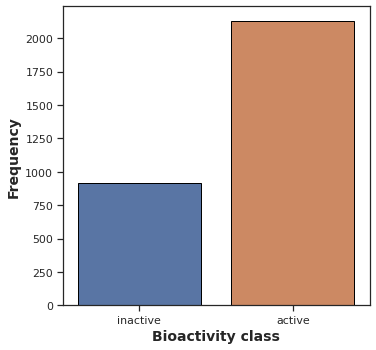

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

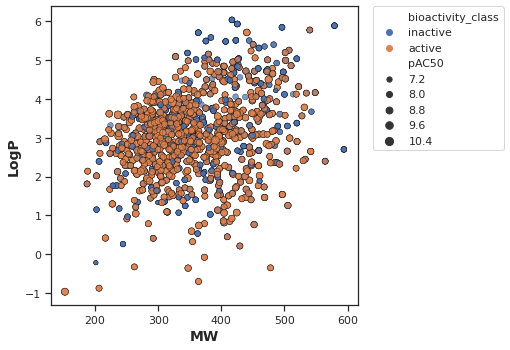

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivity_class', size='pAC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

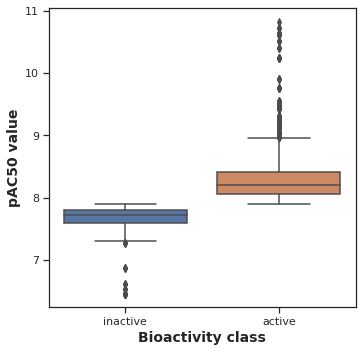

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pAC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pAC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ac50.pdf')

In [58]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [59]:
mannwhitney('pAC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pAC50,1948648.0,0.0,0.05,Different distribution (reject H0)


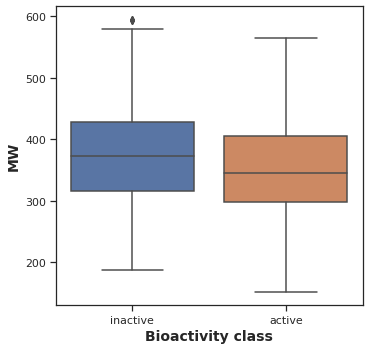

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [61]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,831650.5,1.417371e-10,0.05,Different distribution (reject H0)


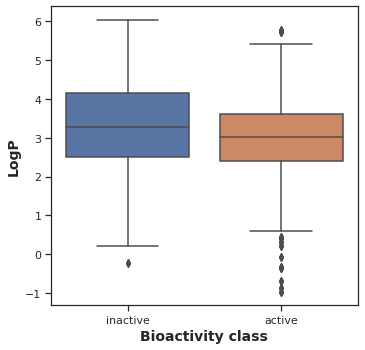

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [63]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,841232.0,2.187057e-09,0.05,Different distribution (reject H0)


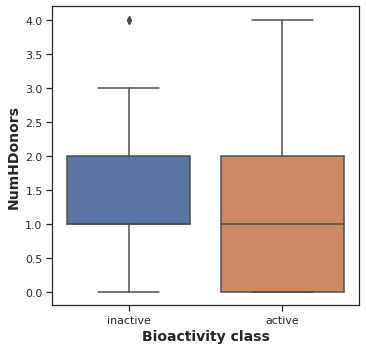

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [65]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,906322.5,0.001151,0.05,Different distribution (reject H0)


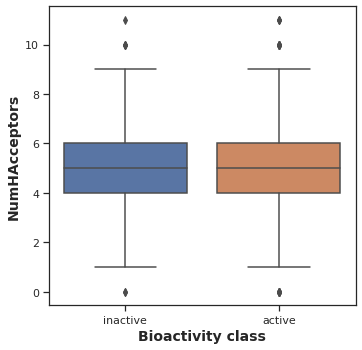

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [67]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,982553.0,0.707355,0.05,Same distribution (fail to reject H0)


In [68]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_ac50.pdf (deflated 36%)
  adding: mitf_eda.csv (deflated 70%)
  adding: bioactivity_data.csv (deflated 92%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_pAC50.csv (deflated 7%)
  adding: bioactivity_preprocessed_data.csv (deflated 76%)


Descriptor calculator

In [69]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-01-28 07:57:57--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-01-28 07:57:57--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   160MB/s    in 0.2s    

2023-01-28 07:57:58 (160 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-01-28 07:57:58--  https://github

In [70]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [71]:
import pandas as pd

In [72]:
df3 = pd.read_csv('/content/mitf_eda.csv')

In [73]:
df3.head(3)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pAC50
0,CHEMBL1438983,OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH]c2ccccc12)c1ccccc1,inactive,425.359,5.92980,3.0,2.0,7.832653
1,CHEMBL1598631,Cc1ccc(C#CC[N+]2(CC#Cc3ccc(C)cc3)CCCCC2)cc1.[Br-],active,422.410,1.71134,0.0,0.0,8.403183
2,CHEMBL1566130,N#C/C(=C(/O)c1ccc([N+](=O)[O-])o1)c1nc2ccccc2[...,active,296.242,3.01398,2.0,6.0,8.420559


In [74]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [75]:
! cat molecule.smi | head -5

OC(CNCC(c1ccc(Cl)cc1Cl)c1c[nH]c2ccccc12)c1ccccc1	CHEMBL1438983
Cc1ccc(C#CC[N+]2(CC#Cc3ccc(C)cc3)CCCCC2)cc1.[Br-]	CHEMBL1598631
N#C/C(=C(/O)c1ccc([N+](=O)[O-])o1)c1nc2ccccc2[nH]1	CHEMBL1566130
CCOc1ccc(C(=O)Nc2cccc(C(=O)O)c2C)cc1Cl	CHEMBL1329803
CC1=C(C#N)C(=O)N(CCO)C(=O)/C1=N/Nc1ccc2c(c1)COC2=O	CHEMBL1990342


In [76]:
! cat molecule.smi | wc -l

3046


In [77]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [78]:
! bash padel.sh

Processing CHEMBL1438983 in molecule.smi (1/3046). 
Processing CHEMBL1598631 in molecule.smi (2/3046). 
Processing CHEMBL1566130 in molecule.smi (3/3046). Average speed: 5.34 s/mol.
Processing CHEMBL1329803 in molecule.smi (4/3046). Average speed: 3.04 s/mol.
Processing CHEMBL1990342 in molecule.smi (5/3046). Average speed: 2.04 s/mol.
Processing CHEMBL1564354 in molecule.smi (6/3046). Average speed: 1.72 s/mol.
Processing CHEMBL1388764 in molecule.smi (7/3046). Average speed: 1.45 s/mol.
Processing CHEMBL1597669 in molecule.smi (8/3046). Average speed: 1.23 s/mol.
Processing CHEMBL1313077 in molecule.smi (9/3046). Average speed: 1.33 s/mol.
Processing CHEMBL1342896 in molecule.smi (10/3046). Average speed: 1.02 s/mol.
Processing CHEMBL1976412 in molecule.smi (11/3046). Average speed: 0.97 s/mol.
Processing CHEMBL1484487 in molecule.smi (12/3046). Average speed: 0.89 s/mol.
Processing CHEMBL3198812 in molecule.smi (14/3046). Average speed: 0.78 s/mol.
Processing CHEMBL1387720 in molecu

In [79]:
! ls -l

total 117624
-rw-r--r-- 1 root root  1777149 Jan 28 07:54 bioactivity_data.csv
-rw-r--r-- 1 root root   226454 Jan 28 07:56 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root  5426941 Jan 28 08:06 descriptors_output.csv
drwx------ 5 root root     4096 Jan 28 07:56 gdrive
drwxr-xr-x 3 root root     4096 Jan 28 07:57 __MACOSX
-rw-r--r-- 1 root root      124 Jan 28 07:57 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      123 Jan 28 07:57 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      133 Jan 28 07:57 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      130 Jan 28 07:57 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      108 Jan 28 07:57 mannwhitneyu_pAC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root   388327 Jan 28 07:57 mitf_eda.csv
-rw-r--r-- 1 root root   184095 Jan 28 07:57 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Jan 28 07:57 padel.sh
-rw-

In [80]:
df3_X = pd.read_csv('descriptors_output.csv')

In [81]:
df3_X.head(3)

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1598631,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1566130,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1438983,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df3_X = df3_X.drop('Name',axis=1)
df3_X.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df3_Y = df3['pAC50']
df3_Y

0       7.832653
1       8.403183
2       8.420559
3       8.067628
4       8.013542
          ...   
3041    8.434034
3042    8.434034
3043    7.863089
3044    7.616526
3045    8.042153
Name: pAC50, Length: 3046, dtype: float64

In [84]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pAC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.832653
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.403183
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.420559
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.067628
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.013542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.434034
3042,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.434034
3043,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.863089
3044,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.616526


In [85]:
dataset3.to_csv('MITFdatafor_model_building.csv', index=False)

Model Building

In [86]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [87]:
df=pd.read_csv('/content/MITFdatafor_model_building.csv')

In [88]:
X = df.drop('pAC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3042,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3043,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3044,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
Y = df.pAC50
Y

0       7.832653
1       8.403183
2       8.420559
3       8.067628
4       8.013542
          ...   
3041    8.434034
3042    8.434034
3043    7.863089
3044    7.616526
3045    8.042153
Name: pAC50, Length: 3046, dtype: float64

In [90]:
X.shape
Y.shape

(3046,)

In [91]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [93]:
X_train.shape, Y_train.shape
X_test.shape, Y_test.shape

((610, 165), (610,))

In [94]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.18339806016929283

In [95]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

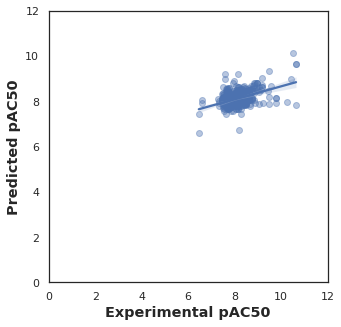

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pAC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pAC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show